#  The Spark Foundation
## TASK 2
### Prediction using Decicion Tree Algorithm
#### Author: Abhishek Dubey                                                                                               
##### linkedin: www.linkedin.com/in/abhishek-dubey96

## Importing the libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [49]:
dt = pd.read_csv("Iris.csv")

In [50]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Here our target variable is present, since it is an unsupervised learning model we don't want it so I will drop the "Species" variable

In [51]:
dt = dt.drop(['Id','Species'],axis=1)

In [52]:
dt

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Extracting values from the dataset

In [54]:
df = dt.values

In [55]:
df

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Clustering model building begins

### Determining number of clusters required

In [58]:
from sklearn.cluster import KMeans
## Number of clusters that may be required
no_of_clusters = range(1,7)

In [59]:
wcss = []

In [60]:
for k in no_of_clusters:
    # Creating a Kmeans class instance with k clusters
    model = KMeans(n_clusters=k, random_state=15)
    # Build the model using the data
    model.fit(df)
    # Append the inertia (wcss) to the list named "wcss"
    wcss.append(model.inertia_)

## Plotting elbow method to know number of clusters required

Text(0, 0.5, 'WCSS')

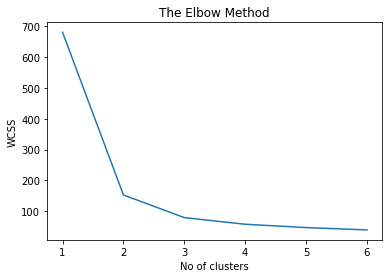

In [62]:
plt.plot(no_of_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')

## From plot it seems that 3 clusters are optimum

### So now let's build our model

In [64]:
model = KMeans(n_clusters=3, random_state=15, init = 'k-means++', max_iter = 200, n_init = 10)
cluster = model.fit_predict(df)

## Plotting the clusters formed

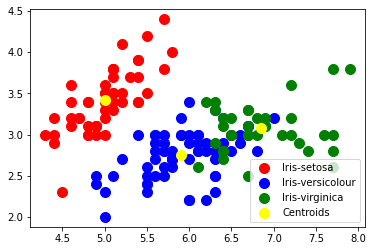

In [66]:
plt.scatter(df[cluster == 0, 0], df[cluster == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df[cluster == 1, 0], df[cluster == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df[cluster == 2, 0], df[cluster == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


## Here we have made our classification based upon the given data

## Thank You